# 4.2.2 Capstone Analystic Report and Research Proposal

## Data Set Description

By:Zhengzhe Xie

__Source__: [https://insights.stackoverflow.com/survey]

__Context__: In this project, I will be studying survey data that provides information about democratic background, salary level, educational level, life style, etc of users and developers from Stackoverflow.com in order to find relationships between each factor and thus might predict a person's salary level. This data set is from the official website of Stackoverflow.com yearly survey.

__Users' Background Data__ : This dataset that assembled by columns that we choose represents the age, salary level, as well as how often do they get paid, years of professionally coding, and their formal highest education level, also like their wake-up time and hours on computer. 

The data set is slightly bias towards the people who work in the hi-tech industry. But my target group are people in this industry, so it makes it a little unbias.

In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
%matplotlib inline

In [2]:
mpl.rcParams['font.size'] = 14.0

In [3]:
df = pd.read_csv("F:/Thinkful/Files/survey_results_public.csv",low_memory = False)

### The data set has over hundred columns, it is necessary to choose the columns that I interested in. 

In [4]:
#Pick those columns that we interested in
df_new=df[['Age','Gender','Employment','Salary','SalaryType','CurrencySymbol','YearsCodingProf','FormalEducation','WakeTime','HoursComputer']].copy()

#Apply the filter so we only focus on those who work in the U.S.A.
df_new=df_new[df_new['CurrencySymbol']=='USD']

### The string answers to the education level is king of messy, so I simplified them accordingly.

In [5]:
#Some college/university study without earning a degree' = 'C W/O D', '
#Bachelor’s degree (BA, BS, B.Eng., etc.)' = 'BA','
#Master’s degree (MA, MS, M.Eng., MBA, etc.)' = 'MA', '
#Associate degree' ='AA'
#Other doctoral degree (Ph.D, Ed.D., etc.)': = 'Ph.D'
#Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': = SecondarySchool'
#Professional degree (JD, MD, etc.)': = 'ProDegree'
#Primary/elementary school' = 'PrimarySchool'
#I never completed any formal education' = 'NoEducation'
df_new['FormalEducation']=df_new['FormalEducation'].map({'Some college/university study without earning a degree': 'C W/O D', 'Bachelor’s degree (BA, BS, B.Eng., etc.)': 'BA','Master’s degree (MA, MS, M.Eng., MBA, etc.)':'MA', 'Associate degree':'AA','Other doctoral degree (Ph.D, Ed.D., etc.)':'Ph.D','Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':'SecondarySchool','Professional degree (JD, MD, etc.)':'ProDegree','Primary/elementary school':'PrimarySchool','I never completed any formal education':'NoEducation'})

In [6]:
#Start cleanning 'Salary' column
#Some of the data under "salary" column contains comma, commonly known as "thousands separator", 
#we need to get rid of them in order to make it numeric.

#Replace , with nothing but to convert 1,000 to 1000
df_new['Salary']=df_new['Salary'].str.replace(',','')

#Put Nan when the data is not numeric 
df_new['Salary']=pd.to_numeric(df_new['Salary'],errors='coerce')

#drop all Nan data (Noise)
#df_new.dropna(subset=['Age','Gender','Salary','SalaryType','CurrencySymbol','YearsCodingProf','FormalEducation','WakeTime','HoursComputer'])
df_new = df_new.dropna()

In [7]:
df_new.describe()

,Salary
count,1.097500e+04
mean,8.557717e+04
std,8.713256e+04
min,0.000000e+00
25%,4.652700e+04
50%,8.500000e+04
75%,1.200000e+05
max,4.000000e+06


__Description of the Data__: Overall the dataset contains many types of values,some of them even have mixed commas and float numbers. Therefore, it is necessary to clean the dataset or clean the column before doing any analyses. For some columns, such as 'Salary', has some obvious unreal value like $0 monthly salary. Therefore we need to specifically clean this column.

### Converting all salary type to yearly

In [8]:
#Setting up conditions for np.select()
conditions = [
    (df_new['SalaryType'] == 'Yearly'),
    (df_new['SalaryType'] == 'Monthly'),
    (df_new['SalaryType'] == 'Weekly'),]

#Picking target columns and apply operations to each number that satisfy the above condition
choices = [
    df_new['Salary'], 
    df_new['Salary']*12, 
    df_new['Salary']*52,]

#Create a new column called "Converted_Salary" that contains all yearly salary.
df_new['Converted_Salary'] = np.select(conditions, choices, default=0)

In [9]:
df_new['Converted_Salary'].describe()

count    1.097500e+04
mean     2.053528e+05
std      8.388269e+05
min      0.000000e+00
25%      5.700000e+04
50%      9.000000e+04
75%      1.250000e+05
max      4.800000e+07
Name: Converted_Salary, dtype: float64

__Discovery of the 'Salary' Column__: After convert all salary type to yearly, I noticed that there are still many crazy value. But I noticed that the 50% is around $90000 yearly. Therefore I think may be I can filter out those unreal value and only keep those I'm interested in by adjust in the upper and lower bound of the column. Below is a illustration by a box plot.

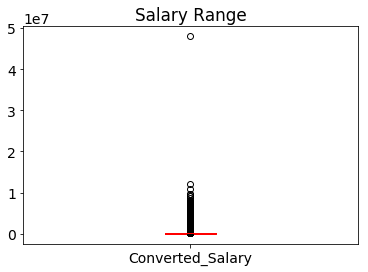

In [10]:
df_new["Converted_Salary"].plot(kind='box',color='red',title  = 'Salary Range')

__First Look of the Box Plot of 'Salary' Column__: As we can see here, many of the salary data are outliers. Even some of them maybe indeed earn 1 million per year, but those people are so rare and may affect our analyses and general conclusion. So I decide to apply filter to the salary in order to keep those reasonable value.

In [11]:
#Some data are obviously not real, such like yearly salary $1, or $3 million. 
#so we remove outliers
df_new=df_new[(df_new['Converted_Salary']<195000) & (df_new['Converted_Salary']>50000)]

__How I get here__: During this process, I keep adjust the upper and lower boundary and use the box plot below to see the result until there are no outliers. The box plot below shows the final result.

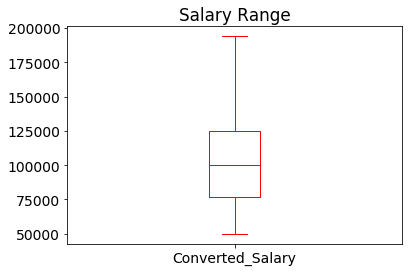

In [12]:
df_new["Converted_Salary"].plot(kind='box',color='red',title  = 'Salary Range')

In [13]:
df_new['Converted_Salary'].describe()

count      7721.000000
mean     103628.694081
std       32720.498587
min       50003.200000
25%       77000.000000
50%      100000.000000
75%      125000.000000
max      194000.000000
Name: Converted_Salary, dtype: float64

__Description of Converted Salary__: So after we convert all currency and salary paid frequency, we finally have a reasonable salary column that we can easily to manipulate. Based on what we see here, there are 7721 sample here, that will be all the people we are gonna focus on for the rest of the analyze of this project. The max, mean, and mid are all reasonable value. 

In [14]:
#Creating a new column so I can divide people with different income level into two groups.

df_new['SalaryLevel'] =np.where(df_new['Converted_Salary']>100000, '50k - 100k', '100k-200k')

# Cleanning Each Column One by One So They are Ready for Descriptive Plotting

In [15]:
df_Age = df_new['Age']
df_Age=pd.DataFrame(df_Age.value_counts())
df_Age['Value'] = df_Age.index

# I skip the 'Salary' column because it needs more manipulation to clean it up

df_SalaryType = df_new['SalaryType']
df_SalaryType=pd.DataFrame(df_SalaryType.value_counts())
df_SalaryType['Value'] = df_SalaryType.index

df_Gender = df_new[(df_new['Gender'] == 'Male')|(df_new['Gender'] == 'Female')]['Gender']
df_Gender = pd.DataFrame(df_Gender.value_counts())
df_Gender['Value'] = df_Gender.index

df_CurrencySymbol = df_new['CurrencySymbol']
df_CurrencySymbol = pd.DataFrame(df_CurrencySymbol.value_counts())
df_CurrencySymbol['Value'] = df_CurrencySymbol.index

df_YearsCodingProf = df_new['YearsCodingProf']
df_YearsCodingProf = pd.DataFrame(df_YearsCodingProf.value_counts())
df_YearsCodingProf['Value'] = df_YearsCodingProf.index

df_FormalEducation = df_new['FormalEducation']
df_FormalEducation = pd.DataFrame(df_FormalEducation.value_counts())
df_FormalEducation['Value'] = df_FormalEducation.index

df_WakeTime = df_new['WakeTime']
df_WakeTime= pd.DataFrame(df_WakeTime.value_counts())
df_WakeTime['Value'] = df_WakeTime.index

df_HoursComputer = df_new['HoursComputer']
df_HoursComputer = pd.DataFrame(df_HoursComputer.value_counts())
df_HoursComputer['Value'] = df_HoursComputer.index

df_SalaryLevel = df_new['SalaryLevel']
df_SalaryLevel = pd.DataFrame(df_SalaryLevel.value_counts())
df_SalaryLevel['Value'] = df_SalaryLevel.index

In [16]:
df_SalaryLevel

,SalaryLevel,Value
100k-200k,4030,100k-200k
50k - 100k,3691,50k - 100k


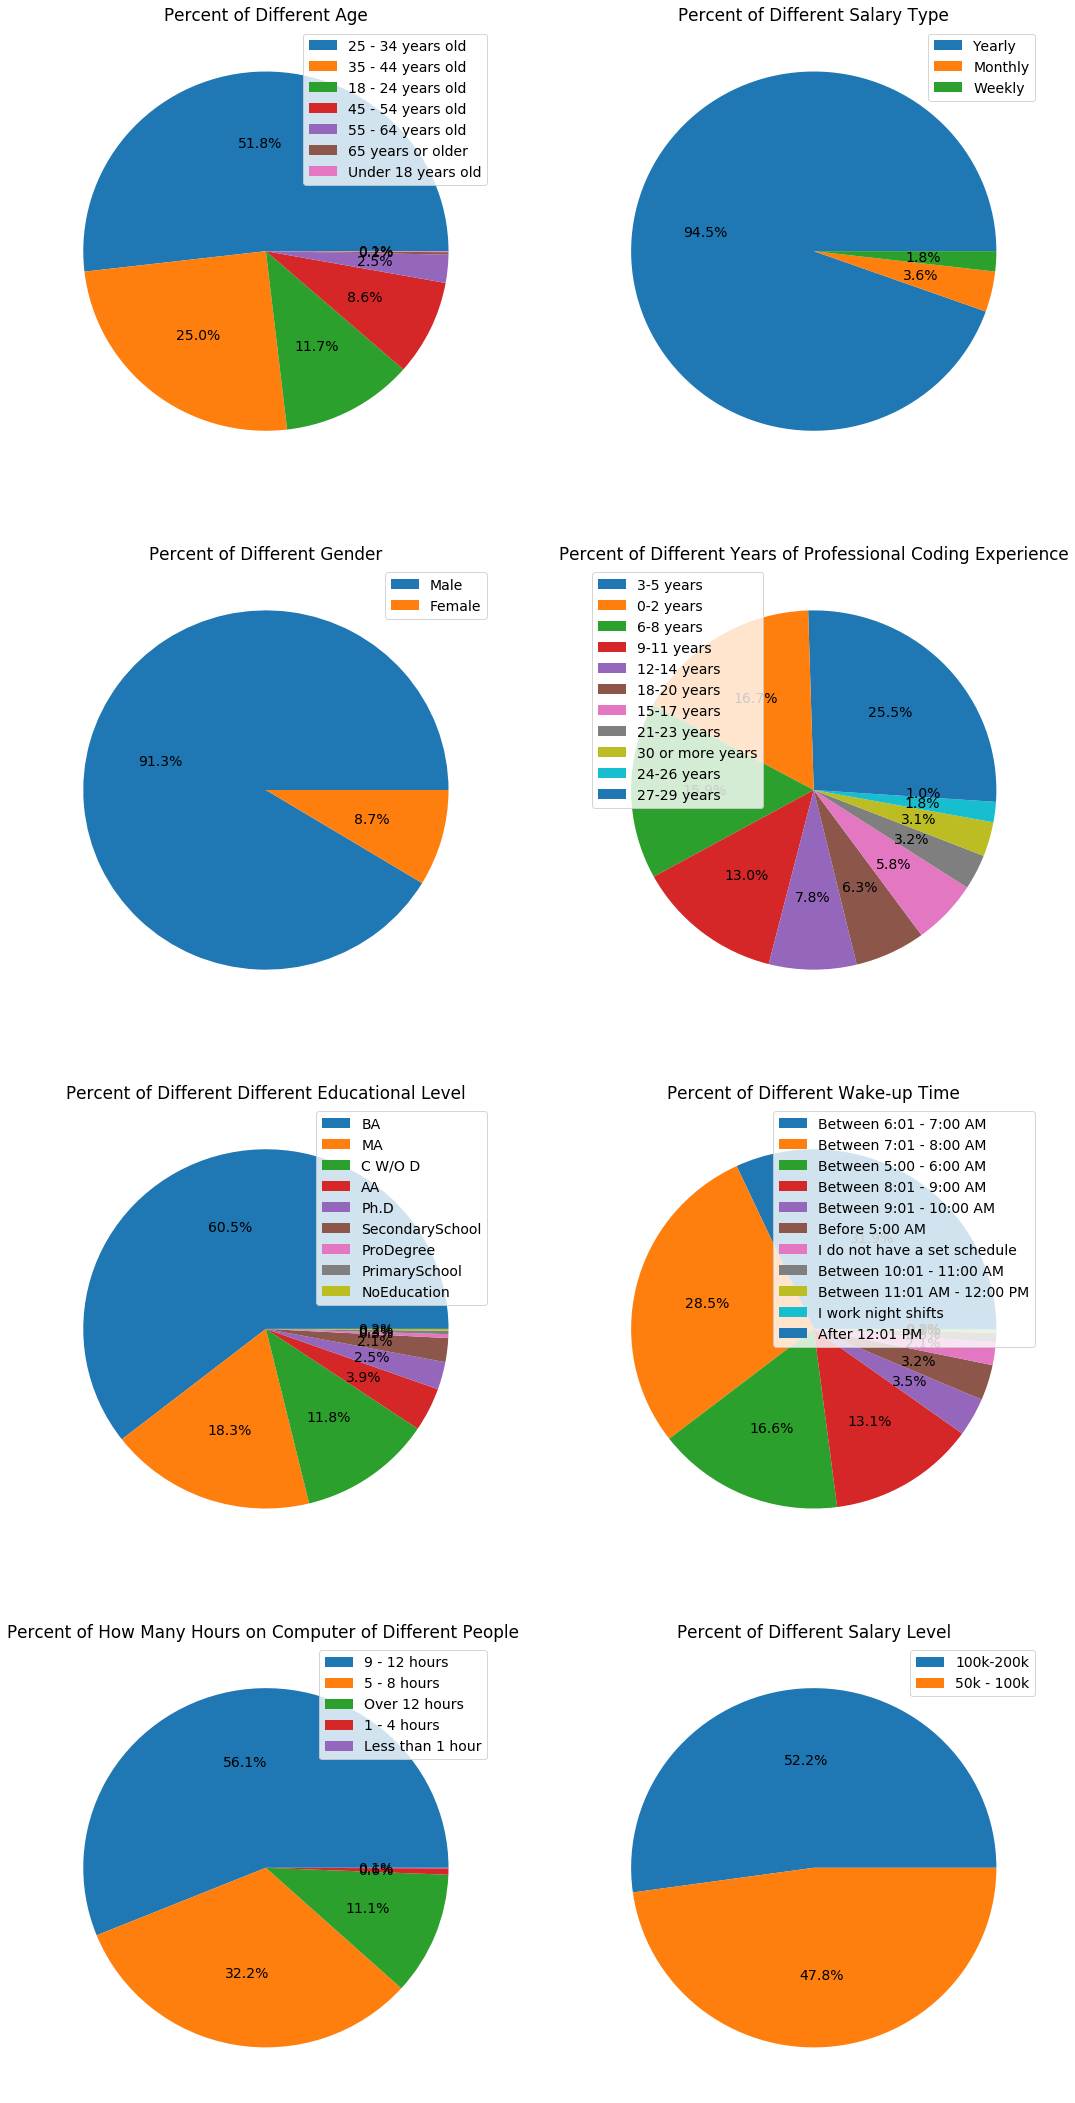

In [16]:
plt.figure(figsize = (18,38))

plt.subplot(4, 2, 1)
plt.pie(df_Age['Age'], autopct='%1.1f%%')
plt.legend(df_Age.sort_values('Age', ascending=False)['Value'],loc='best')
plt.title('Percent of Different Age')

plt.subplot(4, 2, 2)
plt.pie(df_SalaryType['SalaryType'], autopct='%1.1f%%')
plt.legend(df_SalaryType.sort_values('SalaryType', ascending=False)['Value'],loc='best')
plt.title('Percent of Different Salary Type')

plt.subplot(4, 2, 3)
plt.pie(df_Gender['Gender'], autopct='%1.1f%%')
plt.legend(df_Gender.sort_values('Gender', ascending=False)['Value'],loc='best')
plt.title('Percent of Different Gender')

plt.subplot(4, 2, 4)
plt.pie(df_YearsCodingProf['YearsCodingProf'], autopct='%1.1f%%')
plt.legend(df_YearsCodingProf.sort_values('YearsCodingProf', ascending=False)['Value'],loc='best')
plt.title('Percent of Different Years of Professional Coding Experience')

plt.subplot(4, 2, 5)
plt.pie(df_FormalEducation['FormalEducation'], autopct='%1.1f%%')
plt.legend(df_FormalEducation.sort_values('FormalEducation', ascending=False)['Value'],loc='best')
plt.title('Percent of Different Different Educational Level')

plt.subplot(4, 2, 6)
plt.pie(df_WakeTime['WakeTime'], autopct='%1.1f%%')
plt.legend(df_WakeTime.sort_values('WakeTime', ascending=False)['Value'],loc='best')
plt.title('Percent of Different Wake-up Time')

plt.subplot(4, 2, 7)
plt.pie(df_HoursComputer['HoursComputer'], autopct='%1.1f%%')
plt.legend(df_HoursComputer.sort_values('HoursComputer', ascending=False)['Value'],loc='best')
plt.title('Percent of How Many Hours on Computer of Different People ')

plt.subplot(4, 2, 8)
plt.pie(df_SalaryLevel['SalaryLevel'], autopct='%1.1f%%')
plt.legend(df_SalaryLevel.sort_values('SalaryLevel', ascending=False)['Value'],loc='best')
plt.title('Percent of Different Salary Level')

plt.show()

__General Knowledge About This Data Set :__ From the top left pie chart, we can see that most of people are from 25-44 years old group, which is coherent with our real life facts. Most of geeks are male, and they reported their yearly salary. From the 'YearsCodingProf' pie chart, I noticed that even most people are 25-44 years old, but year professional coding length are quite diverge. It's a reflection of the fact that some of them start their professional coding career within recent decades, which is a strong counter debate to the rumor said that "Programming market is saturated". For most of them, they have B.A. as their highest level of degree, but interestingly, there are11.8% of people who don't have degree at all. This is also a proof that there is no high threshhold for entering this field, everybody can do it as long as you want to. Most of them wake up pretty early, and 88.3% of people usually spend 5-12 hours on the computer, that is a normal length if you work as full-time. Their salary level are somehow even, I guess that most people that fall in 50k-100k group are the people who have B.A. degree. I will do some analyze below. Since the distrubution of  'Age', 'YearsCodingProf', 'EducationalLevel','WakeTime', and 'HoursComputer' are pretty diverse, so we will focus on the analysis of how those factors affect the salary level.

# Ask and Answer Analytic Questions

## Question 1

### Is age and years of professioanl coding a factor of salary?

In [17]:
#First, let's see the age factor. We can use the average salary here because it can well represent the salary level of each age group.

Avg_Salary=df_new.groupby('Age').mean()

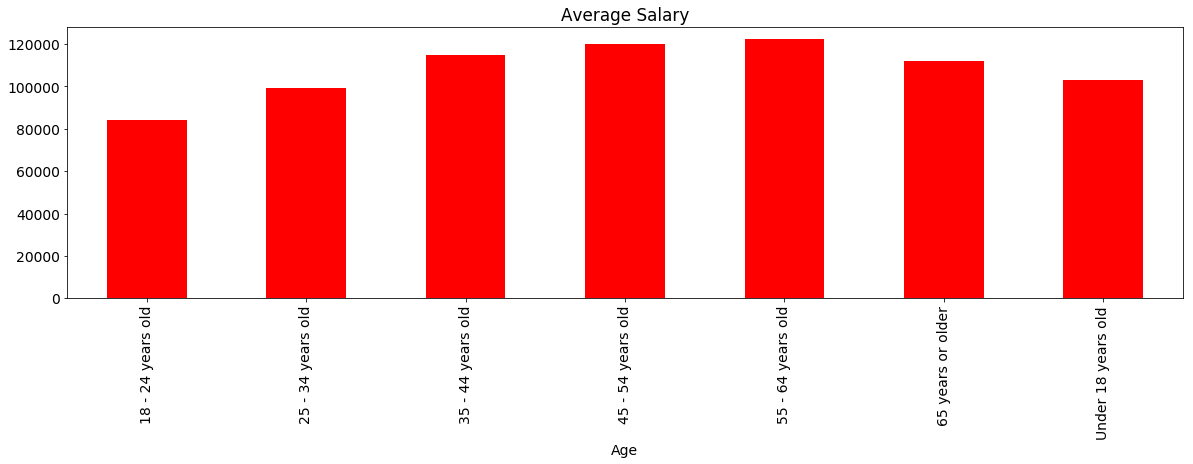

In [18]:
plt.figure(figsize=(20, 5))


Avg_Salary['Converted_Salary'].plot.bar(title='Average Salary',color='red')

plt.show()


In [19]:
#Setting up conditions for np.select()
conditions = [
    (df_new['YearsCodingProf'] == '0-2 years'),
    (df_new['YearsCodingProf'] == '3-5 years'),
    (df_new['YearsCodingProf'] == '6-8 years'),
    (df_new['YearsCodingProf'] == '9-11 years'),
    (df_new['YearsCodingProf'] == '12-14 years'),
    (df_new['YearsCodingProf'] == '15-17 years'),
    (df_new['YearsCodingProf'] == '18-20 years'),
    (df_new['YearsCodingProf'] == '21-23 years'),
    (df_new['YearsCodingProf'] == '24-26 years'),
    (df_new['YearsCodingProf'] == '27-29 years'),
    (df_new['YearsCodingProf'] == '30 or more years'),]

#Picking target columns and apply operations to each number that satisfy the above condition
choices = [1,2,3,4,5,6,7,8,9,10,11]

#Create a new column called "Converted_Salary" that contains all yearly salary.
df_new['YearsCodingOrder'] = np.select(conditions, choices, default=0)

In [20]:
#The average salary based on number of years of professional coding.

YearCodingSalary=df_new.groupby('YearsCodingProf').mean()

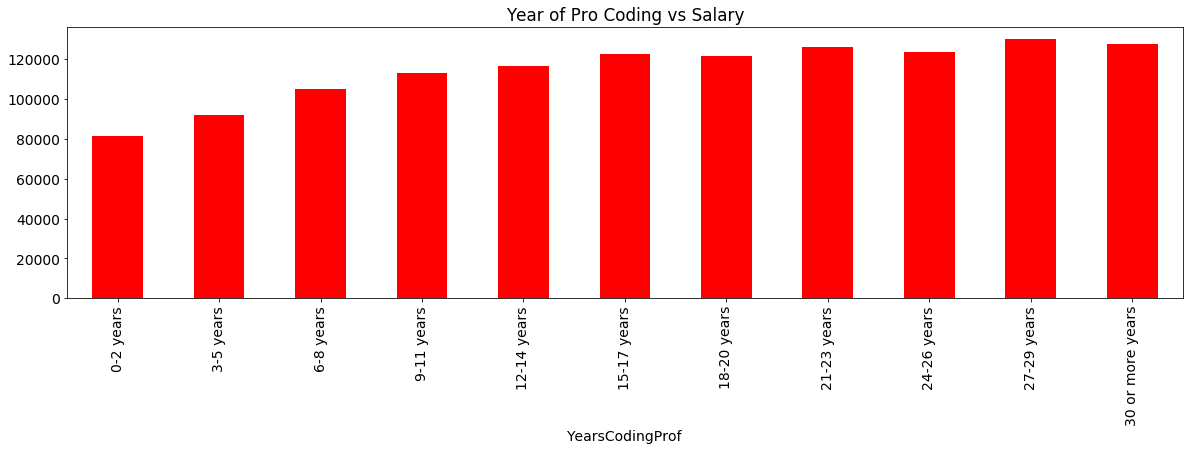

In [21]:
plt.figure(figsize=(20, 5))

YearCodingSalary.sort_values('YearsCodingOrder', ascending=True)['Converted_Salary'].plot.bar(title='Year of Pro Coding vs Salary',color='red')

plt.show()

__Answer to question 1__: The data shows that as people getting older, there is an obvious increasing trend on their salary level. The 18-24 years old group averagely earn 40k less than 55-64 years old group. Due to more people reach to the management level at their elder age, so their income may higher than young people. However, there are not much difference between each adjacent group. If we take a further look to the year of professional coding histogram, we can see that even though there is an increasing trend in salary level, but after the 15-17 years group, there is not much increments. The reason behind it my result in the bottleneck of personal career.

# Question 2

### Dose a person's lifestyle affect their income level?

Description of lifestyle: A person's lifestyle may or may not affect this person's income level, because many of them work late at night and still have good income. But a person's lifestyle may somehow affect a person's health condition so it may further has influence to how this person talk, work, and thus earn money. Within this project, I defined a good lifestyle is waking up early, spend only reasonable hours on work, and have a good degree. 

In [22]:
#Creating a new column called "EducationalLevel" that divide people into two group
#People who have degree Bachelor or above belong to group "UpperOfficial", others belong to the group"LowerRandom"
df_new['EducationalLevel'] =np.where((df_new['FormalEducation']== 'BA') | (df_new['FormalEducation']=='MA')|(df_new['FormalEducation']=='Ph.D'), 'UpperOfficial', 'LowerRandom')

In [23]:
#Here we do the similar method, except that we divide them by their wake-up time. 
#People who wake-up early belong to group"EarlyBird", others belong to the group"LatePerson"
df_new['LazyORdiligent'] = np.where((df_new['WakeTime']=='Before 5:00 AM')|(df_new['WakeTime']=='Between 5:00 - 6:00 AM')|(df_new['WakeTime']=='Between 6:01 - 7:00 AM')|(df_new['WakeTime']=='Between 7:01 - 8:00 AM'),'EarlyBird','LatePerson')

In [24]:
#Similar to the above, but divide them by number of hours they spent on compuer.
#People who spent more than 9 hours on computer belongs to group "workaholic", others belong to group "Relax"
df_new['TimeOnComputer'] = np.where((df_new['HoursComputer']=='9 - 12 hours')|(df_new['HoursComputer']=='Over 12 hours'),'Workaholic','Relax')

In [25]:
#Based on the previous conditions, I named those people who have so-called good lifestyle to "Good", others by the name "ILivemyway"

df_new['lifestyle'] = np.where((df_new['EducationalLevel']=='UpperOfficial')&(df_new['LazyORdiligent']=='EarlyBird')&(df_new['TimeOnComputer']=='Workaholic'),'Good','ILivemyway')

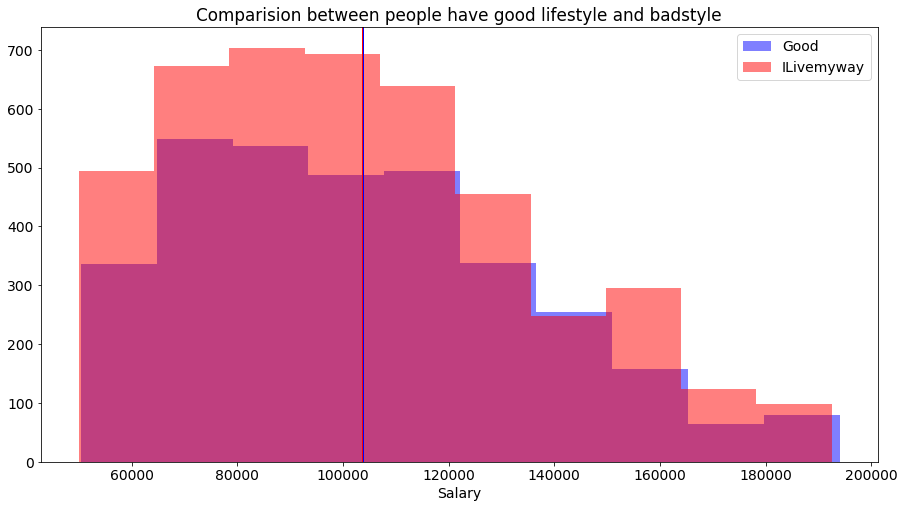

In [26]:
#PWGL = People with good lifestyle
#PWBL = People with bad lifestyle

PWGL=df_new[df_new['lifestyle'] == "Good"]['Converted_Salary']

PWBL=df_new[df_new['lifestyle'] == "ILivemyway"]['Converted_Salary']

plt.figure(figsize=(15, 8))
plt.hist(PWGL, color='blue',alpha=0.5, label = "Good") 
plt.hist(PWBL, color='red',alpha=0.5, label = "ILivemyway")
plt.axvline(np.mean(PWGL), color='blue', linestyle='solid', linewidth=2)
plt.axvline(np.mean(PWBL), color='red', linestyle='solid', linewidth=1)

plt.xlabel("Salary")
#plt.ylabel("Frequency")
plt.title("Comparision between people have good lifestyle and badstyle")
plt.legend()
plt.show()

In [27]:
print(ttest_ind(PWGL,PWBL, equal_var=False))

Ttest_indResult(statistic=0.2406352614531796, pvalue=0.8098447569123316)


__Answer to question 2:__ There is a very interesting thing happening here: people with so-called bad lifestyle generally have higher income than those with good lifestyle. Furthermore, the p-value we got from the t-test showed us that there indeed no direct relationship between lifestyle and income level. Even the chart is not exact normal, we just use t-test as a reference to the conclusion. The problem of this analysis is that we include the column 'EducationalLevel' into my consideration. So I think it may be a factor affected our result significantly. Therefore, it raised another question: Does salary level affected by degree?

# Question 3

### Does salary level affected by degree?

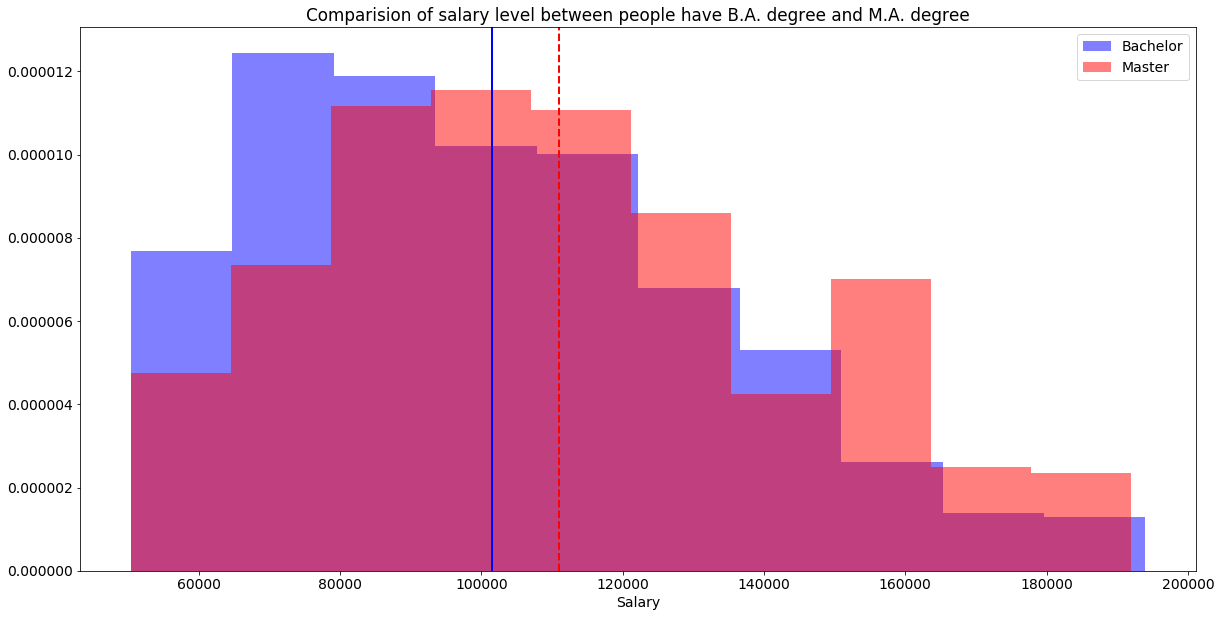

In [28]:
BA=df_new[df_new['FormalEducation'] == 'BA']['Converted_Salary']

MA=df_new[df_new['FormalEducation'] == 'MA']['Converted_Salary']

plt.figure(figsize=(20, 10))
plt.hist(BA, density = True, color='blue',alpha=0.5, label = "Bachelor") 
plt.hist(MA, density= True, color='red',alpha=0.5, label = "Master")
plt.axvline(np.mean(BA), color='blue', linestyle='solid', linewidth=2)
plt.axvline(np.mean(MA), color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Salary")
#plt.ylabel("Frequency")
plt.title("Comparision of salary level between people have B.A. degree and M.A. degree")
plt.legend()
plt.show()

In [29]:
print(ttest_ind(BA,MA, equal_var=False))

Ttest_indResult(statistic=-9.466924020382079, pvalue=6.930610610508487e-21)


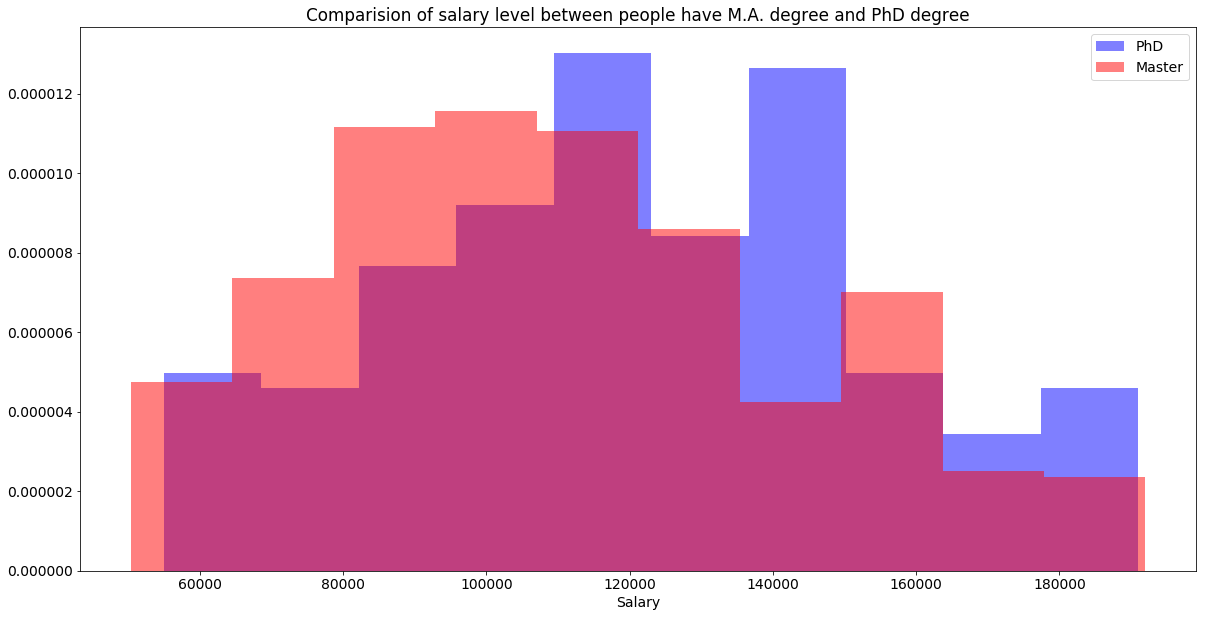

In [30]:
PhD=df_new[df_new['FormalEducation'] =='Ph.D' ]['Converted_Salary']

MA=df_new[df_new['FormalEducation'] == 'MA']['Converted_Salary']

plt.figure(figsize=(20, 10))
plt.hist(PhD, density = True, color='blue',alpha=0.5, label= "PhD") 
plt.hist(MA, density = True, color='red',alpha=0.5,label="Master")
plt.xlabel("Salary")
#plt.ylabel("Frequency")
plt.title("Comparision of salary level between people have M.A. degree and PhD degree")
plt.legend()
plt.show()

In [31]:
print(ttest_ind(PhD,MA, equal_var=False))

Ttest_indResult(statistic=4.136809621029714, pvalue=4.843046941003592e-05)


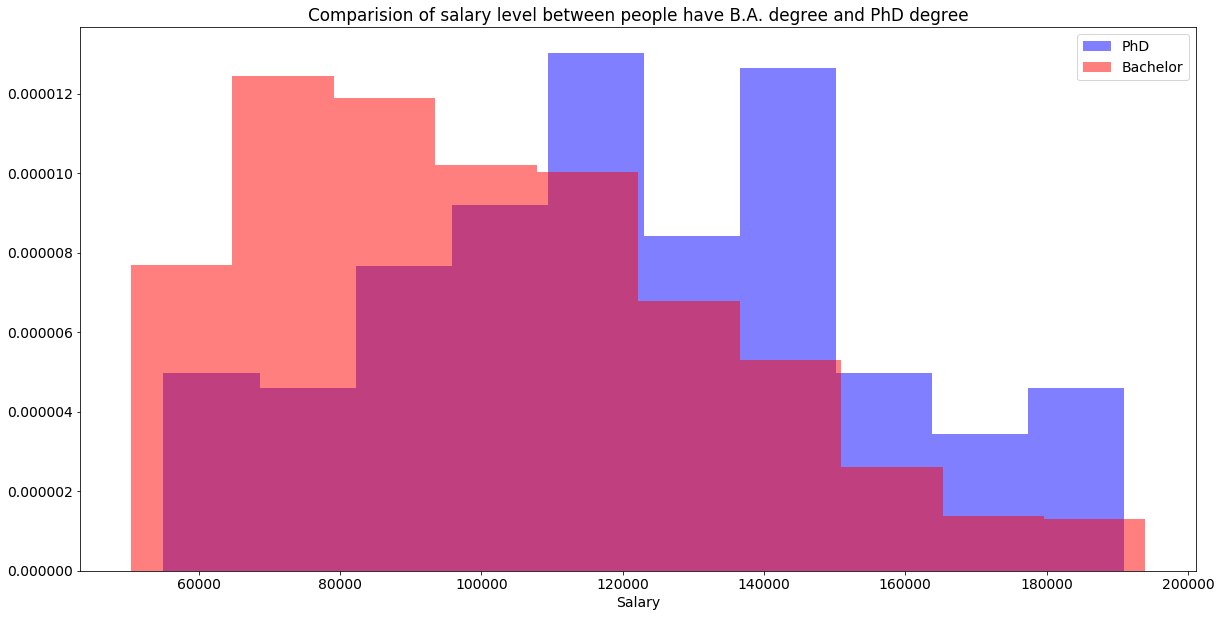

In [32]:
plt.figure(figsize=(20, 10))
plt.hist(PhD, density = True, color='blue',alpha=0.5,label="PhD") 
plt.hist(BA, density = True,color='red',alpha=0.5,label="Bachelor")
plt.xlabel("Salary")
#plt.ylabel("Frequency")
plt.title("Comparision of salary level between people have B.A. degree and PhD degree")
plt.legend()
plt.show()

In [33]:
print(ttest_ind(PhD,BA, equal_var=False))

Ttest_indResult(statistic=8.182677672227504, pvalue=2.8459703132097765e-14)


__Answer to Question 3:__ For this analysis, I've compared the income level of three groups of people who has B.A., people who has M.A., and people who have Ph.D. The result is pretty simple and straight: Degree is a factor of a person's income. The p-values from those three t-test showed that there is a significant difference between each group of people, which is the income level. Visually, we can see from each histogram that people who earn more than 150k per year always appear around the right part of the histogram. So it coherent with our numerical results.

# Question 3.5

### If a person have a full-time job, then is there a directly proportional relationship between how much time they spend on computer and their income level?

In [34]:
df_new = df_new[df_new['Employment'] == "Employed full-time"]

In [35]:
#Setting up conditions for np.select()
conditions = [
    (df_new['HoursComputer'] == 'Over 12 hours'),
    (df_new['HoursComputer'] == '9 - 12 hours'),
    (df_new['HoursComputer'] == '5 - 8 hours'),
    (df_new['HoursComputer'] =='1 - 4 hours'),
    (df_new['HoursComputer'] =='Less than 1 hour')]

#Picking target columns and apply operations to each number that satisfy the above condition
choices = [12, 10.5, 6.5,3.5,1]

#Create a new column called "Converted_Salary" that contains all yearly salary.
df_new['Converted_CompHours'] = np.select(conditions, choices, default=0)

In [36]:
df_new['Converted_CompHours']=pd.to_numeric(df_new['Converted_CompHours'],errors='coerce')

<function matplotlib.pyplot.show(*args, **kw)>

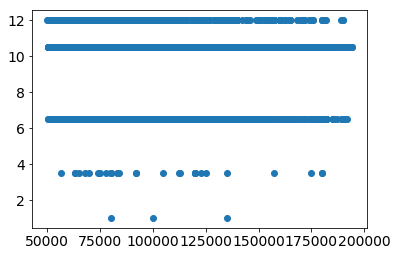

In [37]:
plt.scatter(x=df_new['Converted_Salary'],y=df_new["Converted_CompHours"])
plt.show

__Answer to Question 3.5 :__ Based on the scatter plot, the whole group of people got divided into three groups, some of them spend around 7hours per day on computer, some of them spend 11 hours, and some of them spend over 12 hours on computer. Therefore, the time a person spend on computer does not have relation with how much a person earn. However, we can get a glimpse at the 3-4 hour group. At this group, just 3 people's income level is above 150k per year. If their answer is hones and true, they are either genius or at a very high management level. 

# Propose Further Research 

1. For many catagories, such as number of hours a person spend on computer, could be a specific number, not just a range. If exact number of hours reported, then the final scatter plot may shows the different and interesting result. Moreover, the income level could be all reported in USD currency. Because of the complexity of the work, I only focus on people whose income is in USD, this force me to ignore other people which is what I want to do.
2. This survey conducted every year, so combine previous yearly survey together may be a good idea to have a bigger picture on the trend of some factors, such as their income level, hours they spend on computer, whether a degree is a more serious factor of a person's income level in the past than nowadays? 
3. This is a data collected from stackoverflow.com, but what about other website? The users from other tech website may have different opinions and situations. If other website and stackoverflow can cooperate on this and create larger set of data, I believe the result will be more realistic and could be applied to more people. 